<a href="https://colab.research.google.com/github/vikram-menon/ASL-Alphabet-Translation/blob/master/ASL_Alphabet_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
!unzip "/content/drive/My Drive/cnn/resized/asl-full.zip"

Streaming output truncated to the last 5000 lines.
  inflating: asl-full/validation/S/S2868.jpg  
  inflating: asl-full/validation/S/S288.jpg  
  inflating: asl-full/validation/S/S2880.jpg  
  inflating: asl-full/validation/S/S2885.jpg  
  inflating: asl-full/validation/S/S2886.jpg  
  inflating: asl-full/validation/S/S289.jpg  
  inflating: asl-full/validation/S/S2898.jpg  
  inflating: asl-full/validation/S/S2899.jpg  
  inflating: asl-full/validation/S/S2903.jpg  
  inflating: asl-full/validation/S/S2912.jpg  
  inflating: asl-full/validation/S/S2913.jpg  
  inflating: asl-full/validation/S/S2918.jpg  
  inflating: asl-full/validation/S/S2947.jpg  
  inflating: asl-full/validation/S/S2949.jpg  
  inflating: asl-full/validation/S/S295.jpg  
  inflating: asl-full/validation/S/S2950.jpg  
  inflating: asl-full/validation/S/S2952.jpg  
  inflating: asl-full/validation/S/S2953.jpg  
  inflating: asl-full/validation/S/S2955.jpg  
  inflating: asl-full/validation/S/S2958.jpg  
  inflating:

In [2]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = '/content/asl-full/'

from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 100

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Using TensorFlow backend.


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [0]:

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 29

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
696/696 [==============================] - 41s 58ms/step - loss: 2.4948 - acc: 0.2786 - val_loss: 2.1818 - val_acc: 0.3433

Epoch 00001: val_acc improved from -inf to 0.34328, saving model to model_weights.h5
Epoch 2/50
696/696 [==============================] - 31s 45ms/step - loss: 1.2350 - acc: 0.6125 - val_loss: 0.9610 - val_acc: 0.6960

Epoch 00002: val_acc improved from 0.34328 to 0.69598, saving model to model_weights.h5
Epoch 3/50
696/696 [==============================] - 32s 46ms/step - loss: 0.7037 - acc: 0.7818 - val_loss: 0.4902 - val_acc: 0.8424

Epoch 00003: val_acc improved from 0.69598 to 0.84241, saving model to model_weights.h5
Epoch 4/50
696/696 [==============================] - 32s 46ms/step - loss: 0.4408 - acc: 0.8640 - val_loss: 0.2812 - val_acc: 0.9055

Epoch 00004: val_acc improved from 0.84241 to 0.90546, saving model to model_weights.h5
Epoch 5/50
696/696 [==============================] - 31s 45ms/step - loss: 0.2924 - acc: 0.9102 - val_loss: 0.

In [0]:
model.save('full.model')

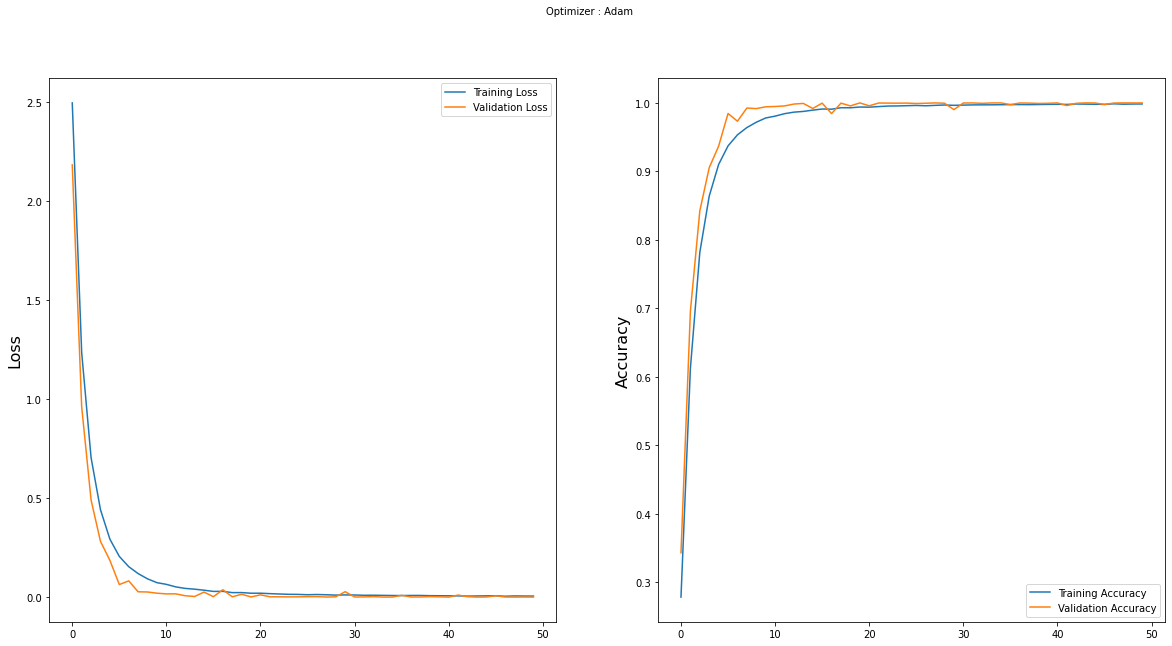

In [8]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:
import tensorflow as tf
import cv2
import numpy as np






CATEGORIES = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]





def prepare(filepath):
    IMG_SIZE = 48
    img_array = cv2.imread(filepath, cv2. IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) 





model = tf.keras.models.load_model("/content/full.model")





In [15]:
prediction = model.predict([prepare("img")])



print(prediction)
print(CATEGORIES[int(np.argmax(prediction[0]))])

[[4.96215569e-12 3.02157422e-14 1.18907444e-08 3.17769221e-13
  4.49527221e-12 4.48060439e-14 1.03219044e-10 5.07160802e-09
  1.83694070e-13 1.23474234e-12 4.43343177e-14 1.73634571e-14
  1.60769328e-10 6.33813801e-09 6.50754450e-12 5.05377074e-10
  1.72350110e-06 5.56788921e-11 4.87517582e-10 4.09186227e-11
  1.26462575e-13 2.94640614e-13 3.00846397e-13 7.75021214e-10
  1.40834483e-10 2.46426612e-06 9.99995828e-01 1.16109466e-09
  1.08367525e-11]]
del
